## Final Project Submission

Please fill out:
* Student name: Myrna Grace Calip
* Student pace: Part-Time
* Scheduled project review date/time: 9/2/21
* Instructor name: Claude Fried
* Blog post URL:


# Overview
Microsoft is looking to create a movie studio using the following movie datasets:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

As a part of the Microsoft Film Analytics team, we are using our knowledge understand the given data to find which types of films are currently doing the best at the box office. 

## Business Problem
What type of films Microsoft should invest in to create a profitable and successful movie?

## Business Value

Many factors are considered into a production of a film. Funding, directors, genre, and ratings are highly regarded to avid movie goers. In order to maximize the success of Microsoft's movie production we will need to focus on the following questions:

- What genres are the most popular to consider?
- Which genre generates the most profit?
- When is the best time to release a film?
- 

Once we gather our information we will determine the recommendations Microsoft needs to release a film that will catch the eye of the audience. 

# What can we find from the data given to us?
We need to follow certain steps in order to find valuable information from our data.
1. Load and explore the data
2. Sort out what data we should use - Data cleansing & Mining
3. Find the information we need to gain insights

## What genres are the most popular to consider?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

%matplotlib inline

In [2]:
# Load The Movie Data Base to get an overview of the data
tmdb_movies = 'tmdb.movies.csv.gz'

df_tmdb_movies = pd.read_csv(f'zippedData/{tmdb_movies}', index_col=0)
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
# Get general statistics of the numerical values
df_tmdb_movies_stats = df_tmdb_movies.describe()
df_tmdb_movies_stats

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


Here are the stats of the 

In [4]:
# check for duplicates in the dataset
df_tmdb_movies[df_tmdb_movies.duplicated()]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
...,...,...,...,...,...,...,...,...,...
26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [5]:
# drop the duplicates
df_tmdb_movies = df_tmdb_movies.drop_duplicates()
df_tmdb_movies = df_tmdb_movies.drop(["genre_ids", "original_language"], axis = 1)
df_tmdb_movies = df_tmdb_movies.rename(columns={"original_title": "movie"})
df_tmdb_movies
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            25497 non-null  int64  
 1   movie         25497 non-null  object 
 2   popularity    25497 non-null  float64
 3   release_date  25497 non-null  object 
 4   title         25497 non-null  object 
 5   vote_average  25497 non-null  float64
 6   vote_count    25497 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [6]:
# Import and inspect the data for inconsistencies
imbd_title = 'imdb.title.basics.csv.gz'

imbd_title_data = pd.read_csv(f'zippedData/{imbd_title}')
imbd_title_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [7]:
imbd_title_data.info()
imbd_title_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [8]:
imbd_title_data = imbd_title_data.drop(["original_title", "runtime_minutes", "tconst"], axis = 1)
imbd_title_data.dropna(inplace=True)  # drop missing value genres
imbd_title_data = imbd_title_data.rename(columns={"primary_title": "movie"})
imbd_title_data.isna().sum()
imbd_title_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   movie       140736 non-null  object
 1   start_year  140736 non-null  int64 
 2   genres      140736 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [9]:
# Hello new clean data
imbd_title_data

,movie,start_year,genres
0,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,"Biography,Drama"
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...
146138,The Secret of China,2019,"Adventure,History,War"
146139,Kuambil Lagi Hatiku,2019,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,Dankyavar Danka,2013,Comedy


In [10]:
def first_genre_listed(n):
    # Return only the first genre listed
    n = str(n)
    if n == '\\N':
        return ''
    return n.split(',')[0].strip()

imbd_title_data['genres'] = imbd_title_data['genres'].apply(first_genre_listed)

imbd_title_data

,movie,start_year,genres
0,Sunghursh,2013,Action
1,One Day Before the Rainy Season,2019,Biography
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,Comedy
4,The Wandering Soap Opera,2017,Comedy
...,...,...,...
146138,The Secret of China,2019,Adventure
146139,Kuambil Lagi Hatiku,2019,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,Dankyavar Danka,2013,Comedy


In [11]:
imbd_tmdb_df = imbd_title_data.merge(df_tmdb_movies, on = "movie", how="inner")
imbd_tmdb_df

,movie,start_year,genres,id,popularity,release_date,title,vote_average,vote_count
0,The Other Side of the Wind,2018,Drama,299782,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,Bigfoot,2017,Horror,117856,2.813,2012-06-30,Bigfoot,2.9,26
2,Bigfoot,2018,Action,117856,2.813,2012-06-30,Bigfoot,2.9,26
3,Bigfoot,2018,Animation,117856,2.813,2012-06-30,Bigfoot,2.9,26
4,Heaven & Hell,2018,Drama,567662,0.600,2018-11-06,Heaven & Hell,7.5,2
...,...,...,...,...,...,...,...,...,...
19890,Vacancy,2018,Documentary,475066,0.649,2017-10-27,Vacancy,9.0,1
19891,John Leguizamo's Latin History for Morons,2018,Comedy,557606,4.304,2018-11-05,John Leguizamo's Latin History for Morons,7.3,13
19892,The Flare,2017,Sport,469698,0.600,2017-07-11,The Flare,9.0,1
19893,Terra,2018,Documentary,536235,1.767,2018-04-24,Terra,5.0,1


In [12]:
imbd_tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19895 entries, 0 to 19894
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         19895 non-null  object 
 1   start_year    19895 non-null  int64  
 2   genres        19895 non-null  object 
 3   id            19895 non-null  int64  
 4   popularity    19895 non-null  float64
 5   release_date  19895 non-null  object 
 6   title         19895 non-null  object 
 7   vote_average  19895 non-null  float64
 8   vote_count    19895 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.5+ MB


In [13]:
# remove the columns we don't need
imbd_tmdb_df = imbd_tmdb_df.drop(["start_year", 'title'], axis = 1)
imbd_tmdb_df

,movie,genres,id,popularity,release_date,vote_average,vote_count
0,The Other Side of the Wind,Drama,299782,9.800,2018-11-02,7.0,64
1,Bigfoot,Horror,117856,2.813,2012-06-30,2.9,26
2,Bigfoot,Action,117856,2.813,2012-06-30,2.9,26
3,Bigfoot,Animation,117856,2.813,2012-06-30,2.9,26
4,Heaven & Hell,Drama,567662,0.600,2018-11-06,7.5,2
...,...,...,...,...,...,...,...
19890,Vacancy,Documentary,475066,0.649,2017-10-27,9.0,1
19891,John Leguizamo's Latin History for Morons,Comedy,557606,4.304,2018-11-05,7.3,13
19892,The Flare,Sport,469698,0.600,2017-07-11,9.0,1
19893,Terra,Documentary,536235,1.767,2018-04-24,5.0,1


[Text(0.5, 1.0, 'Genre vs. Popularity'),
 Text(0.5, 0, 'Genres'),
 Text(0, 0.5, 'Popularity')]

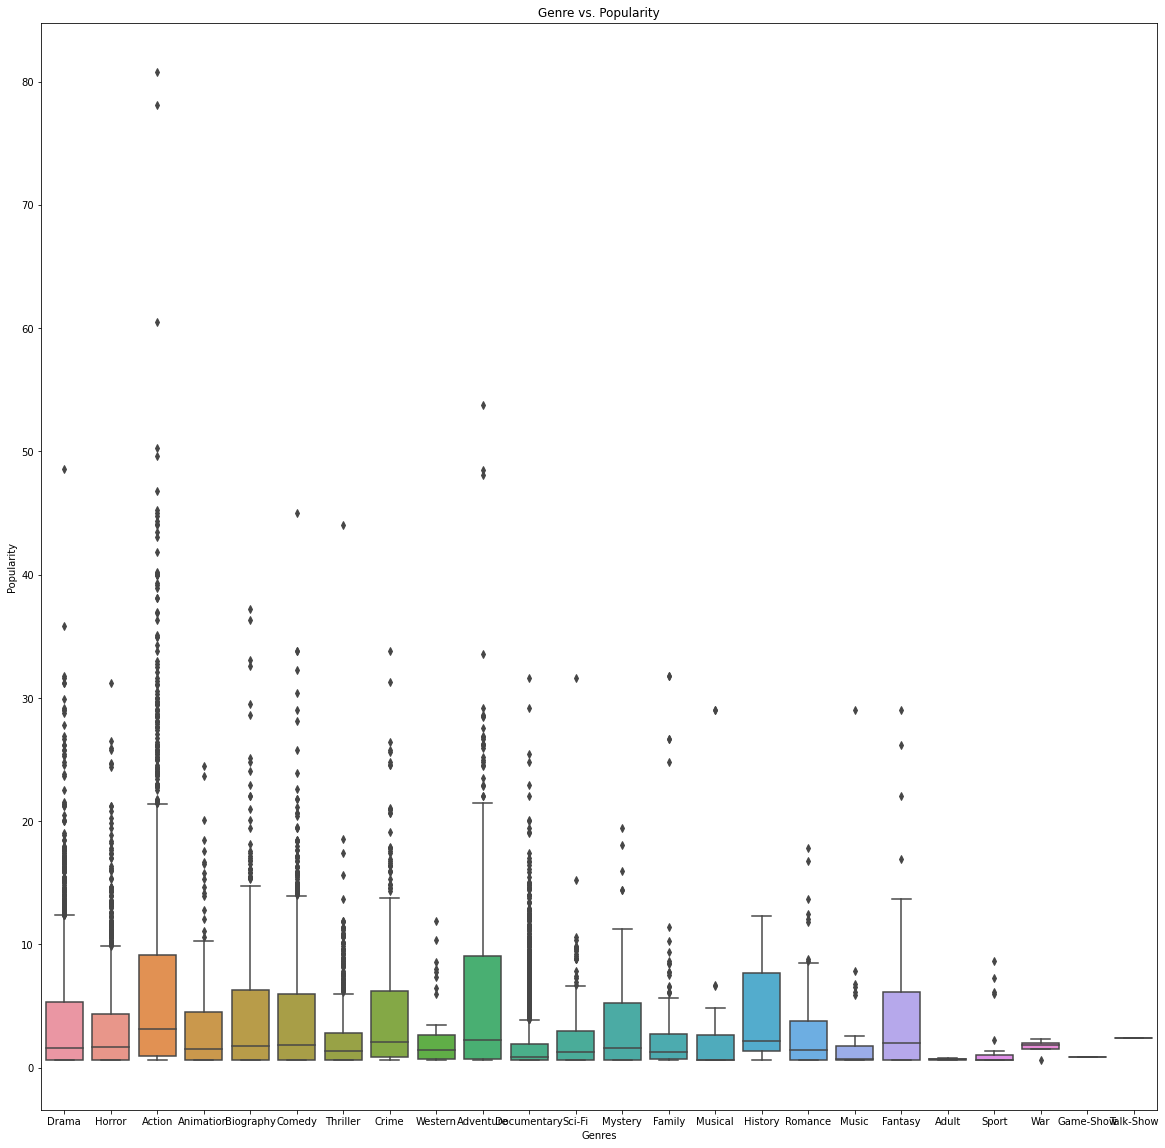

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.boxplot(data = imbd_tmdb_df, x= 'genres', y = 'popularity', ax = ax)
ax.set(title = "Genre vs. Popularity", xlabel = 'Genres', ylabel = 'Popularity')

Action, Adventure, Drama, Comedy, and Thriller has the highest popularity rating.

## Which genre generates the most profit?

In [15]:
movie_budgets = 'tn.movie_budgets.csv.gz'

df_movie_budgets = pd.read_csv(f'zippedData/{movie_budgets}')
df_movie_budgets
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [16]:
def reformat_money(money):
    money = money.replace(',','')
    return int(money[1:])

df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].apply(reformat_money)
df_movie_budgets['domestic_gross'] = df_movie_budgets['domestic_gross'].apply(reformat_money)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].apply(reformat_money)

df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [17]:
# Create revenue column
revenue = df_movie_budgets['domestic_gross'] + df_movie_budgets['worldwide_gross']
profit = revenue - df_movie_budgets['production_budget']

df_movie_budgets['revenue'] = revenue
df_movie_budgets['profit'] = profit

# df_movie_budgets['revenue'] = revenue
df_movie_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [18]:
imdb_tmdb_budgets = df_movie_budgets.merge(imbd_title_data, on='movie',)
imdb_tmdb_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit,start_year,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,2011,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,2011,Action
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,2019,Action
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,2015,Action
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,2018,Action
...,...,...,...,...,...,...,...,...,...,...
3738,67,"Apr 28, 2006",Clean,10000,138711,138711,277422,267422,2017,Comedy
3739,68,"Jul 6, 2001",Cure,10000,94596,94596,189192,179192,2011,Drama
3740,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,9168,168,2011,Comedy
3741,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,2019,Horror


In [19]:
imdb_tmdb_budgets.duplicated(subset='id')

0       False
1       False
2       False
3       False
4       False
        ...  
3738     True
3739     True
3740     True
3741     True
3742     True
Length: 3743, dtype: bool

In [20]:
imdb_tmdb_budgets = imdb_tmdb_budgets.drop_duplicates(subset='id')
imdb_tmdb_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit,start_year,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,2011,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,2011,Action
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,2019,Action
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,2015,Action
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,2018,Action
...,...,...,...,...,...,...,...,...,...,...
339,8,"Jul 26, 2013",The Wolverine,115000000,132556852,416456852,549013704,434013704,2013,Action
345,20,"Jul 29, 2011",The Smurfs,110000000,142614158,563749323,706363481,596363481,2011,Adventure
367,63,"Oct 26, 2012",Cloud Atlas,102000000,27108272,130673154,157781426,55781426,2012,Action
694,6,"Oct 12, 2018",First Man,60000000,44936545,105203825,150140370,90140370,2018,Biography


In [21]:
profit_genre_total = imdb_tmdb_budgets.groupby(['genres']).profit.sum()
profit_genre_total

genres
Action       47877547379
Adventure    16576686512
Animation      366396126
Biography       90140370
Comedy        1432514135
Crime         1035697703
Drama         1482847203
Horror        3111852904
Name: profit, dtype: int64

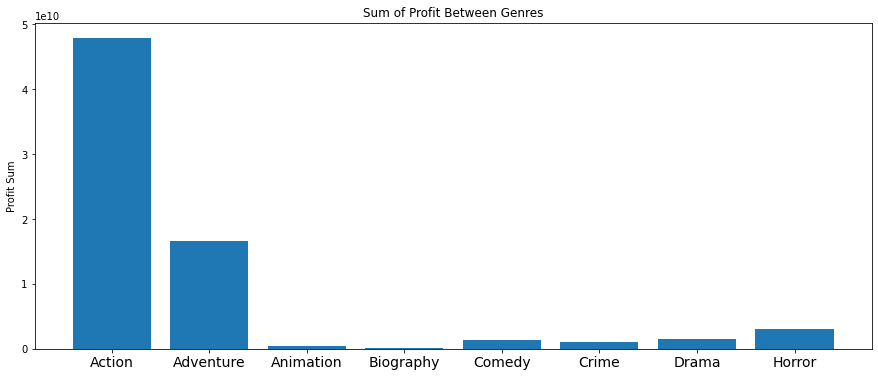

In [33]:
# how do i fix this?

fig, ax = plt.subplots(figsize=(15,6))
data = profit_genre_total
genre = data.index 
total = data.values
# create bar chart 
ax.bar(genre, total) 
# set title and labels 
ax.set_title('Sum of Profit Between Genres') 
ax.set_ylabel('Profit Sum')
plt.rc('xtick', labelsize=14);

In [43]:
profit_genre_average = imdb_tmdb_budgets.groupby(['genres']).profit.mean()
profit_genre_average

fig, ax = plt.subplots()
ax.hist(profit_genre_average, color='Blue')
ax.set_xlabel('Genre');
ax.set_ylabel('Profit Mean)
ax.set_title('Distribution Genre by Profit Mean');

SyntaxError: EOL while scanning string literal (<ipython-input-43-d73bc217dd46>, line 7)

In [ ]:
# Visualization for average profit

Comparing the results to popularity Action, Adventure, Horror, and Drama are still at the top.

## When is the best time to release a film?


In [45]:
imdb_tmdb_release = imdb_tmdb_budgets.copy()
imdb_tmdb_release['Month'] = imdb_tmdb_release['release_date'].str[:3]
imdb_tmdb_release

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit,start_year,genres,Month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,2011,Horror,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,2011,Action,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,2019,Action,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,2015,Action,May
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,2018,Action,Apr
...,...,...,...,...,...,...,...,...,...,...,...
339,8,"Jul 26, 2013",The Wolverine,115000000,132556852,416456852,549013704,434013704,2013,Action,Jul
345,20,"Jul 29, 2011",The Smurfs,110000000,142614158,563749323,706363481,596363481,2011,Adventure,Jul
367,63,"Oct 26, 2012",Cloud Atlas,102000000,27108272,130673154,157781426,55781426,2012,Action,Oct
694,6,"Oct 12, 2018",First Man,60000000,44936545,105203825,150140370,90140370,2018,Biography,Oct


In [67]:
# lets rearrange the columns around so the release_date, Month and start_year are together
rearrange_columns = list(imdb_tmdb_release.columns)
rearrange_columns

['id',
 'release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'revenue',
 'profit',
 'start_year',
 'genres',
 'Month']

In [68]:
rearrange_columns[0],rearrange_columns[10] = rearrange_columns[10],rearrange_columns[0]
rearrange_columns[2],rearrange_columns[8] = rearrange_columns[8],rearrange_columns[2]
rearrange_columns

['Month',
 'release_date',
 'start_year',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'revenue',
 'profit',
 'movie',
 'genres',
 'id']

In [72]:
imdb_tmdb_release = imdb_tmdb_release[rearrange_columns]
imdb_tmdb_release.sort_values(by="start_year", ascending=False)

,Month,release_date,start_year,production_budget,domestic_gross,worldwide_gross,revenue,profit,movie,genres,id
2,Jun,"Jun 7, 2019",2019,350000000,42762350,149762350,192524700,-157475300,Dark Phoenix,Action,3
120,Feb,"Feb 14, 2019",2019,170000000,85710210,402976036,488686246,318686246,Alita: Battle Angel,Action,24
93,Mar,"Mar 8, 2019",2019,175000000,426525952,1123061550,1549587502,1374587502,Captain Marvel,Action,96
78,May,"May 24, 2019",2019,182000000,246734314,619234314,865968628,683968628,Aladdin,Adventure,81
42,Jun,"Jun 15, 2018",2018,200000000,608581744,1242520711,1851102455,1651102455,Incredibles 2,Action,44
...,...,...,...,...,...,...,...,...,...,...,...
126,Mar,"Mar 26, 2010",2010,165000000,217581232,494870992,712452224,547452224,How to Train Your Dragon,Action,30
50,Jul,"Jul 28, 1951",2010,3000000,0,0,0,-3000000,Alice in Wonderland,Adventure,60
288,Mar,"Mar 3, 2017",2010,127000000,226277068,615461394,841738462,714738462,Logan,Comedy,59
11,Nov,"Nov 24, 2010",2010,260000000,200821936,586477240,787299176,527299176,Tangled,Adventure,15
